In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-flops-loglog)

Let's repeat the experiment of the previous figure for more, and larger, values of $n$.

In [2]:
randn(5,5)*randn(5);  # throwaway to force compilation

n = 400:200:6000
t = []
for n in n
    A = randn(n, n)  
    x = randn(n)
    time = @elapsed for j in 1:50; A * x; end
    push!(t, time)
end

Plotting the time as a function of $n$ on log-log scales is equivalent to plotting the logs of the variables.

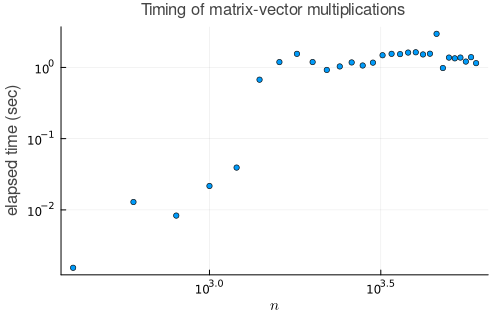

In [3]:
scatter(n, t, label="data", legend=false,
    xaxis=(:log10, L"n"), yaxis=(:log10, "elapsed time (sec)"),
    title="Timing of matrix-vector multiplications")

You can see that while the full story is complicated, the graph is trending to a straight line of positive slope. For comparison, we can plot a line that represents $O(n^2)$ growth exactly. (All such lines have slope equal to 2.)

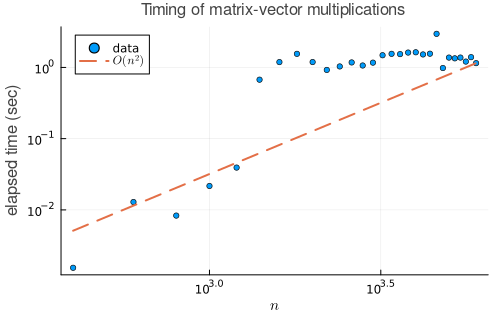

In [4]:
plot!(n, t[end] * (n/n[end]).^2, l=:dash,
    label=L"O(n^2)", legend=:topleft)